In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import glob
import os

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,MaxPooling2D
from keras.layers.convolutional import Conv2D

In [3]:
asl_ds = tf.keras.preprocessing.image_dataset_from_directory('./asl_dataset')

Found 2515 files belonging to 36 classes.


In [4]:
class_names=asl_ds.class_names
class_names

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

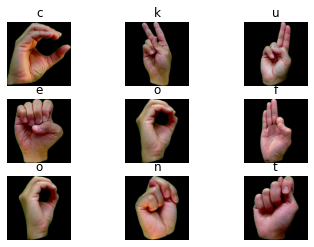

In [5]:
for images, labels in asl_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [6]:
minValue = 70
data=[]
def func(path):    
    frame = cv2.imread(path)
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),2)

    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    resized = cv2.resize(res,(128,128), interpolation = cv2.INTER_AREA)
    data.append(resized)
    return resized

<class 'numpy.ndarray'>


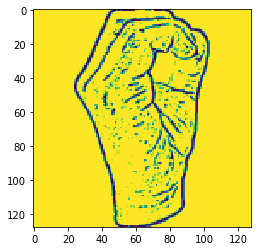

In [7]:
arr=func('./asl_dataset/0/hand5_0_dif_seg_2_cropped.jpeg')
print(type(arr))
plt.imshow(arr, interpolation='nearest')
plt.show()

In [8]:
def img_preprocess(path):
    for class_name in class_names:
        files=glob.glob(path+'/'+class_name)
        listOfImg=os.listdir(files[0])
        for i in listOfImg:
            # print(files[0]+"/"+i)
            ele=func(files[0]+"/"+i)
            # data.append(ele)
            X.append(ele)
            y.append(class_name)

In [9]:
X=[]
y=[]
img_preprocess('./asl_dataset')

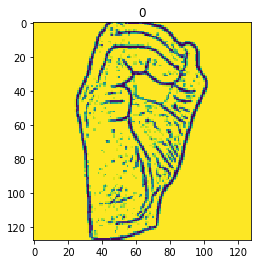

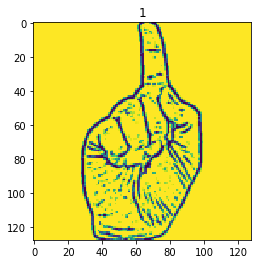

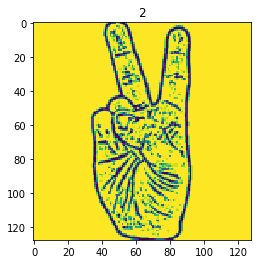

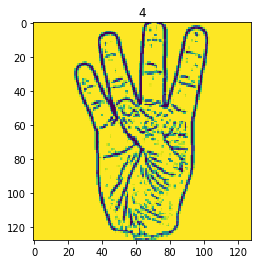

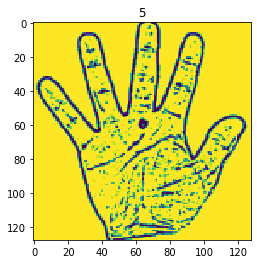

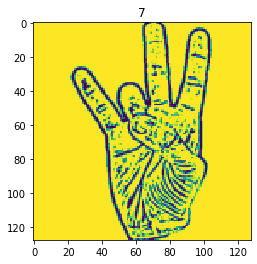

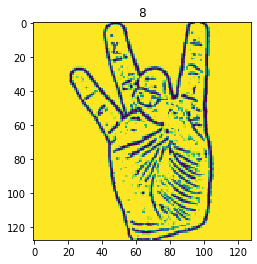

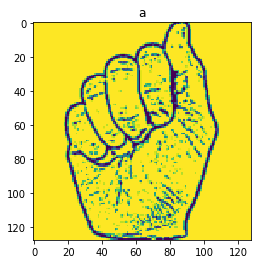

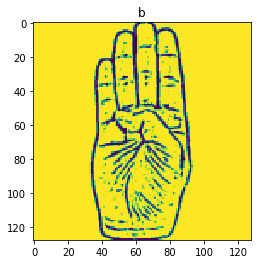

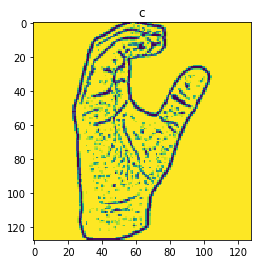

In [10]:
for i in range(0,1000,100):
    plt.imshow(X[i], interpolation='nearest')
    plt.title(y[i])
    plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=np.array(X)
y=np.array(y)
X.shape

(2515, 128, 128)

In [13]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y=lb.fit_transform(y)

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(128, 128, 1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(36, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
# model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=2, validation_data=(X_test, y_test))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 124, 124, 32)      832       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 14, 14, 64)      

In [55]:
model.fit(X_train, y_train, epochs=20, verbose=2, validation_data=(X_test, y_test))

Epoch 1/30
63/63 - 29s - loss: 7.3647 - accuracy: 0.1600 - val_loss: 1.6603 - val_accuracy: 0.5666 - 29s/epoch - 467ms/step
Epoch 2/30
63/63 - 31s - loss: 1.1666 - accuracy: 0.6665 - val_loss: 0.7794 - val_accuracy: 0.7893 - 31s/epoch - 487ms/step
Epoch 3/30
63/63 - 28s - loss: 0.5035 - accuracy: 0.8405 - val_loss: 0.4597 - val_accuracy: 0.8847 - 28s/epoch - 449ms/step
Epoch 4/30
63/63 - 27s - loss: 0.2904 - accuracy: 0.9056 - val_loss: 0.3459 - val_accuracy: 0.9165 - 27s/epoch - 430ms/step
Epoch 5/30
63/63 - 27s - loss: 0.1850 - accuracy: 0.9438 - val_loss: 0.3164 - val_accuracy: 0.9085 - 27s/epoch - 427ms/step
Epoch 6/30
63/63 - 28s - loss: 0.1745 - accuracy: 0.9438 - val_loss: 0.2736 - val_accuracy: 0.9284 - 28s/epoch - 441ms/step
Epoch 7/30
63/63 - 27s - loss: 0.1112 - accuracy: 0.9627 - val_loss: 0.3243 - val_accuracy: 0.9264 - 27s/epoch - 423ms/step
Epoch 8/30
63/63 - 27s - loss: 0.0925 - accuracy: 0.9702 - val_loss: 0.4676 - val_accuracy: 0.9165 - 27s/epoch - 423ms/step
Epoch 9/

KeyboardInterrupt: 

In [29]:
model.save("model/CNN.h5")

In [30]:
from tensorflow.keras.models import load_model

In [31]:
loaded_model=load_model("model/CNN.h5")

In [32]:
y_pred=model.predict(X_test)

16/16 [==============================] - 2s 117ms/step


In [40]:
pred=[]
for i in y_pred:
    # print(i.argmax(axis=0))
    pred.append(i.argmax(axis=0))

In [42]:
pred=np.array(pred)

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.7876363831247423

In [ ]:
Y